In [1]:
import autograd.numpy as np
from autograd import grad

## Generate some linear 2 dimensional input data with some small noise
$Y = W.X + \mathcal{N}(0, 0.025)$ 

In [2]:
x1 = np.linspace(0,1, 20)
x2 = np.linspace(0,1, 20)
y = 10*x1 + 20*x2 + np.random.normal(0, 0.025, x1.shape[0])
inputs = np.column_stack((x1,x2))

In [3]:

def linear_predictions(weights, inputs):
    # Outputs linear regresssion model
    return np.dot(inputs, weights)

## Define the Square Error Losss
$J = \frac{1}{2} \sum_{i=1}^{i=n} \left(y_i - \hat{y}_i(x)\right)^2 $

In [5]:
def training_loss(weights):
    # Compute mean square loss
    preds = linear_predictions(weights, inputs)
    res = y - preds
    sq_res = res * res
    J = 0.5 * np.sum(sq_res)
    return J

## Set up the Gradient Calculation

In [6]:

# Define a function that returns gradients of training loss using autograd.
training_gradient_fun = grad(training_loss)


## Run Gradient Descent
  $w(t+1) = w(t) -\alpha *  \bigtriangledown\left(loss\right) $ , here $\alpha$ is the learning rate

In [7]:
# Optimize weights using gradient descent.
weights = np.array([0.2, 0.1])
print "Initial loss:", training_loss(weights)
for i in xrange(5000):
    weights -= training_gradient_fun(weights) * 0.01
print  "Trained loss:", training_loss(weights)

Initial loss: 3019.602350827706
Trained loss: 0.0048771100180321665


In [8]:
pred_output = linear_predictions(weights, inputs)

## Plot the Results

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

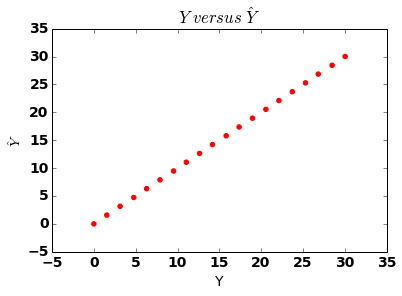

In [16]:
plt.scatter(y, pred_output, color = "red")
plt.xlabel("Y")
plt.ylabel(r'$\hat{Y}$')
plt.title(r'$Y\ versus\ \hat{Y}$')